In [ ]:
from google.colab import files
uploaded= files.upload()

Saving FlightFare_Cleaned.csv to FlightFare_Cleaned (1).csv


Feature dopo il preprocessing (train): 9

=== Valutazione del modello Random Forest Ottimizzato ===
MAE: 1439.4
MSE: 8580245.61
RMSE: 2929.21
R2 Score: 0.9831


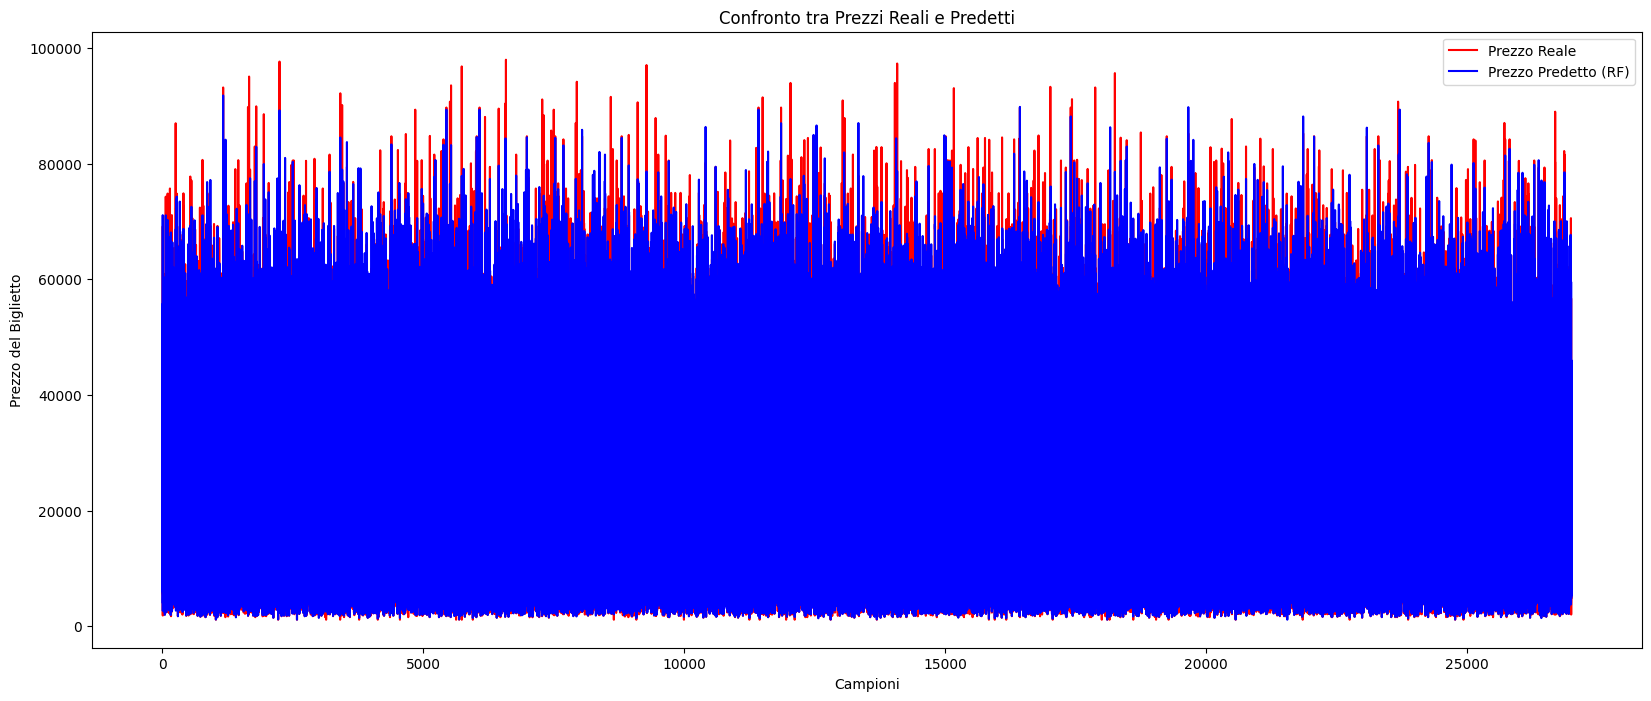

Modello addestrato e salvato con successo!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Caricamento del dataset
df = pd.read_csv("FlightFare_Cleaned.csv")

# Eliminazione di colonne non necessarie
columns_to_drop = ["Unnamed: 0.1", "Unnamed: 0", "zscore", "flight"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

# Riduzione del dataset al 30% per risparmiare memoria
df_sampled = df.sample(frac=0.3, random_state=42)

# Separare features e target
X_sampled = df_sampled.drop(["price"], axis=1)
y_sampled = df_sampled["price"]

# Applicare Label Encoding alle variabili categoriali
categorical_cols = X_sampled.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_sampled[col] = le.fit_transform(X_sampled[col])
    label_encoders[col] = le

# Separazione delle feature numeriche e categoriali
numerical_cols = ["duration", "days_left"]
numerical_features = X_sampled[numerical_cols]
categorical_features = X_sampled.drop(columns=numerical_cols)

# Normalizzazione solo sulle caratteristiche numeriche
scaler = MinMaxScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Unione delle feature numeriche scalate con quelle categoriali
X_scaled = np.hstack([categorical_features.values, numerical_features_scaled])

# Salvataggio dell'ordine delle feature per l'inferenza
feature_order = categorical_features.columns.tolist() + numerical_cols

print(f"Feature dopo il preprocessing (train): {X_scaled.shape[1]}")

# Divisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sampled, test_size=0.30, random_state=42)

# Addestrare il modello Random Forest con i migliori iperparametri trovati
best_rf = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
best_rf.fit(X_train, y_train)

# Predire i prezzi con il modello ottimizzato
y_pred = best_rf.predict(X_test)

# Funzione per calcolare e stampare le metriche
def print_metrics(y_true, y_pred, model_name):
    print(f"\n=== Valutazione del modello {model_name} ===")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("MSE:", round(mean_squared_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R2 Score:", round(r2_score(y_true, y_pred), 4))

# Stampare le metriche del modello ottimizzato
print_metrics(y_test, y_pred, "Random Forest Ottimizzato")

# Confronto tra prezzi reali e predetti
plt.figure(figsize=(20, 8))
sns.lineplot(x=range(len(y_test)), y=y_test, color="red", label="Prezzo Reale")
sns.lineplot(x=range(len(y_pred)), y=y_pred, color="blue", label="Prezzo Predetto (RF)")
plt.xlabel("Campioni")
plt.ylabel("Prezzo del Biglietto")
plt.title("Confronto tra Prezzi Reali e Predetti")
plt.legend()
plt.show()

# Salvataggio del modello, del MinMaxScaler, dei LabelEncoders e dell'ordine delle feature
with open("flight_price_predictor.pkl", "wb") as f:
    pickle.dump(best_rf, f)

with open("scaler_and_encoders.pkl", "wb") as f:
    pickle.dump((scaler, label_encoders), f)

with open("feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)

print("Modello addestrato e salvato con successo!")


In [ ]:
files.download("feature_order.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
from google.colab import files
files.download("flight_price_predictor.pkl")
files.download("scaler_and_encoders.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>